In [11]:
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy
from State import State

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
3978
850
1104
332
1088
934
216
212
254
890
178
562
98
232
206
242
178
286
46
84
226
96
46
74
34
76
48
46
28
28
28
34
64
26
30
24
30
30
24
[(3978, 0), (850, 0), (1104, 0), (332, 0), (1088, 0), (934, 0), (216, 0), (212, 0), (254, 0), (890, 0), (178, 0), (562, 0), (98, 0), (232, 0), (206, 0), (242, 0), (178, 0), (286, 0), (46, 0), (84, 0), (226, 0), (96, 0), (46, 0), (74, 0), (34, 0), (76, 0), (48, 0), (46, 0), (28, 0), (28, 0), (28, 0), (34, 0), (64, 0), (26, 0), (30, 0), (24, 0), (30, 0), (30, 0), (24, 0), (26, 0)]
[[3978], [850], [1104], [332], [1088], [934], [216], [212], [254], [890], [178], [562], [98], [232], [206], [242], [178], [286], [46], [84], [226], [96], [46], [74], [34], [76], [48], [46], [28], [28], [28], [34], [64], [26], [30], [24], [30], [30], [24], [26]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[3978.0, 850.0, 1104.0, 332.0, 1088.0, 

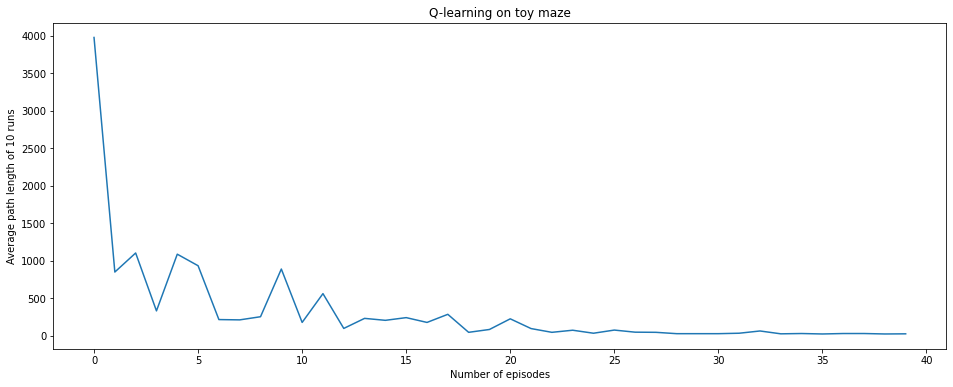

In [12]:
def main_algo(maze: Maze, rewards, eps=0.1, alfa=0.7, gamma=0.9, max_iter=30000, max_episodes=16):
    reward_coordinates = dict()
    for i in range(len(rewards)):
        reward = rewards[i]
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates[State(reward[0], reward[1], 1)] = i

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0

    # keep learning until you decide to stop
    while not stop:
        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)

        # Update Q(s,a) matrix
        learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break

        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append((robot.nr_of_actions_since_reset, reward_coordinates[robot.get_state(maze)]))
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

    return steps_per_iter

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 40
max_iterations = 30000
eps = 0.1

for runNumber in range(1):
    res = main_algo(alfa=alfa, gamma=gamma, max_episodes=max_episodes, max_iter=max_iterations, eps=eps, maze=maze, rewards=rewards)
    print(res)

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append([0 for i in rewards])
    
    for i in range(len(res)):
        reward_number = res[i][1]
        steps_per_episode[i][reward_number] += res[i][0]
        runs_reaching_episode[i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

x = np.array(range(len(runs_reaching_episode)))
y = np.array(steps_per_episode).T[0] / np.array(runs_reaching_episode)

print(y.tolist())
plt.figure(figsize=(16,6))
plt.title("Q-learning on toy maze")
plt.xlabel('Number of episodes')
plt.ylabel('Average path length of 10 runs')
plt.plot(x.tolist(), y.tolist())
#plt.ylim(0, np.max(y) * 1.1)
